# Imports

In [1]:
import pandas as pd
from os import chdir, scandir, makedirs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from glob import glob

from tqdm import tqdm_notebook as tqdm

import os

from itertools import cycle
from multiprocessing import Pool, cpu_count

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os

sys.path.append(os.path.abspath('../..'))

In [4]:
from hit_finding.constants import *
from hit_finding.metrics import *

In [5]:
from learning_tabular.constants import CHANNELS, FAMILIES, LABEL_FIELD
from learning_tabular.preprocessing import load_plate_csv, list_columns

# Compare Visual an Tabular Results

In [41]:
models = [m for m in os.listdir(r'/storage/users/g-and-n/visual_models_results/30000') if m not in ['results']]

res={m: pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(f'/storage/users/g-and-n/visual_models_results/30000/results/z_scores/{m}/*.csv')]) for m in models}

res = {m: df.add_suffix(f'_{m}') for m, df in res.items()}

vis_res = pd.concat(res.values(), axis=1)

vis_res = vis_res.query('Well_Role != "mock"')
vis_res.index = vis_res.index.droplevel([1])
vis_res.shape

(126499, 72)

In [33]:
models = [m for m in os.listdir(r'/storage/users/g-and-n/visual_models_results/30000') if m not in ['results']]
# models = [m for m in models if '4TO1' in m]
models

['UNET4TO1',
 'UNET1TO1',
 'AUTO1TO1',
 'UNET4TO1_mf16',
 'AUTO4TO1',
 'AUTO4TO1_mf16']

In [34]:
res = {}

for m in models:
    dfs = []
    for pth in tqdm(glob(f'/storage/users/g-and-n/visual_models_results/30000/results/errors/{m}/*.csv')):
        dfs.append(pd.read_csv(pth, index_col=[0,1,2,3,4,5]))
        
    res[m] = pd.concat(dfs)
    res[m] = res[m].query('Well_Role == "mock"').filter(regex='ALL_(MSE|raw|map)', axis=1).add_suffix(f'_{m}')
    

/tmp/ipykernel_18331/399569443.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pth in tqdm(glob(f'/storage/users/g-and-n/visual_models_results/30000/results/errors/{m}/*.csv')):


  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

In [ ]:
vis_res = pd.concat(res.values(), axis=1)

In [ ]:
res={m: pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(f'/storage/users/g-and-n/visual_models_results/30000/results/errors/{m}/*.csv')]) for m in models}

res = {m: df.add_suffix(f'_{m}') for m, df in res.items()}

vis_res = pd.concat(res.values(), axis=1)

# vis_res = vis_res.query('Well_Role != "mock"')
# vis_res.index = vis_res.index.droplevel([1])
vis_res.shape

In [ ]:
vis_res = vis_res[~vis_res.index.isin([26576,25732,25742,25740,25741,25739],level=0)]
vis_res.shape

In [39]:
pd.concat([df.describe() for m, df in res.items()], axis=1)

,ALL_MSE_UNET4TO1,ALL_MSE_UNET1TO1,ALL_MSE_AUTO1TO1,ALL_MSE_UNET4TO1_mf16,ALL_MSE_AUTO4TO1,ALL_MSE_AUTO4TO1_mf16
count,240058.000000,240058.000000,240058.000000,240058.000000,240058.000000,240058.000000
mean,0.036949,0.000839,0.016639,0.068913,0.042010,0.089367
std,0.179983,0.000320,0.011303,0.268573,0.196992,0.214203
min,0.001113,0.000255,0.001439,0.003825,0.001143,0.002985
25%,0.015328,0.000706,0.009689,0.030149,0.018141,0.043287
50%,0.024819,0.000818,0.014539,0.046819,0.029383,0.067909
75%,0.040503,0.000933,0.021465,0.078208,0.047924,0.107726
max,32.769039,0.038457,0.660443,38.671438,33.073025,32.187695


In [33]:
vis_res.query('Well_Role == "mock"').filter(regex='ALL_(MSE|raw|map)', axis=1).describe()

,ALL_MSE_UNET4TO1,ALL_MSE_UNET1TO1,ALL_MSE_AUTO1TO1,ALL_MSE_UNET4TO1_mf16,ALL_MSE_AUTO4TO1,ALL_MSE_AUTO4TO1_mf16
count,2.010000e+04,2.010000e+04,2.010000e+04,2.010000e+04,2.010000e+04,2.010000e+04
mean,-4.197858e-19,3.839936e-17,3.285376e-17,2.675582e-17,9.500416e-18,8.616656e-18
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.499543e+00,-4.652078e+00,-3.450445e+00,-2.750014e+00,-2.480270e+00,-3.080686e+00
25%,-4.835921e-01,-5.540705e-01,-6.403312e-01,-4.931299e-01,-4.856755e-01,-5.159493e-01
50%,-1.899611e-01,-9.018489e-02,-5.029250e-02,-1.911510e-01,-1.824237e-01,-1.783196e-01
75%,1.544191e-01,4.627019e-01,5.930959e-01,1.896108e-01,1.879774e-01,2.680926e-01
max,1.546793e+01,1.433385e+01,1.605854e+01,1.586101e+01,1.573151e+01,1.578299e+01


In [6]:
res = {model: 
       pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) 
                  for pth in glob(f'/storage/users/g-and-n/visual_models_results/30000/results/z_scores/pure/{m}/*.csv')]) 
       for model, m in zip(['AUTO1T01', 'UNET4TO1'], ['raw1to1','err'])}

vis_res = res['UNET4TO1'].join(res['AUTO1T01'], lsuffix='_4to1', rsuffix='_1to1')

In [7]:
vis_res = vis_res.query('Well_Role != "mock"')
vis_res.index = vis_res.index.droplevel([1])
vis_res.shape

(126499, 24)

In [ ]:
vis_res.filter(regex='ALL', axis=1).describe()

In [40]:
res_pth = '/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/frac_score'
plates = os.listdir(os.path.join(res_pth, '4'))
plates = [p.split('.')[0] for p in plates]
plates.sort()

tbl_zscores = {t: 
               pd.concat([ 
                pd.read_csv(os.path.join(res_pth, str(t), f'{p}.csv'), index_col=[0,1,2])#.droplevel([2])
                for p in plates if int(p) not in [26576,25732,25742,25740,25741,25739]]) 
               for t in [4,16]}# range(2,21)}

In [10]:
tbl_zscores[4].shape

(125947, 18)

In [42]:
all_scores = tbl_zscores[4].join(vis_res, on=['Plate', 'Metadata_broad_sample', 'Image_Metadata_Well'])
all_scores.shape, all_scores.isna().sum().sum()

((125947, 90), 0)

In [43]:
for c in all_scores.columns:
    if 'PCC' in c:
        all_scores[c] = all_scores[c]*-1  

In [12]:
CHANNELS

['AGP', 'DNA', 'ER', 'Mito', 'RNA']

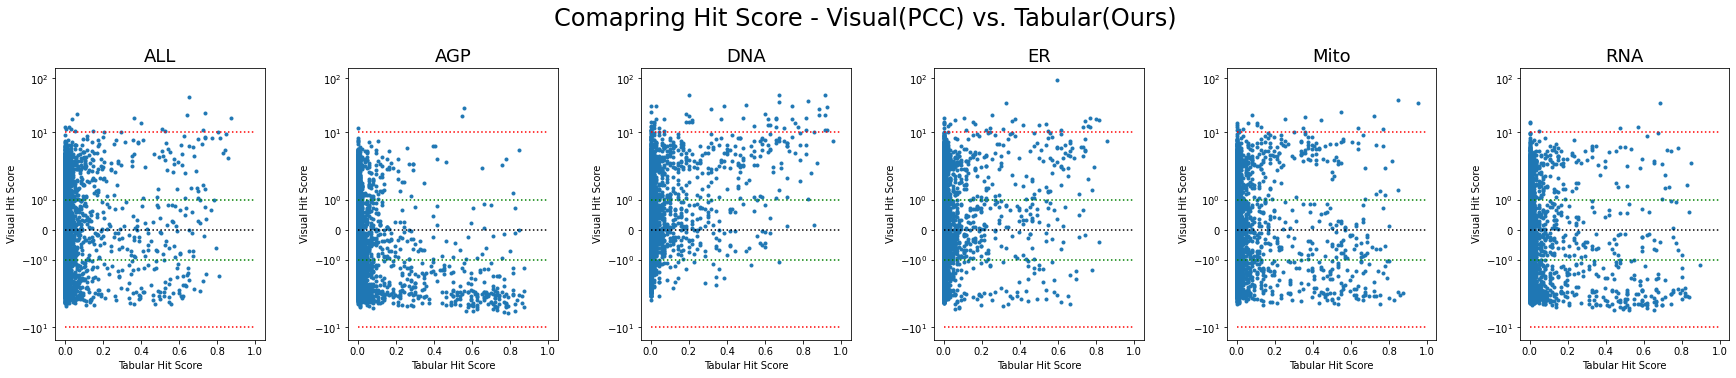

In [69]:
ncol = 6
nrow = 1

d={'xlabel':"Tabular Hit Score", 'ylabel':"Visual Hit Score"}
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle(f'Comapring Hit Score - Visual(PCC) vs. Tabular(Ours)', fontsize = 24, y=1.05)

for i, chan in enumerate(['ALL'] + CHANNELS):
    ax[i].set_yscale('symlog', base=10)
#     ax[i].set_xscale('symlog', base=10)
#     ax[i].set(xlim=(0, 40), ylim=(0, 40))
    
    ax[i].plot(all_scores[f'{chan}_map'], all_scores[f'PCC_{chan}']*-1, '.')
    ax[i].plot([0,1], [0,0], 'k:')
    ax[i].plot([0,1], [1,1], 'g:')
    ax[i].plot([0,1], [-1,-1], 'g:')
    ax[i].plot([0,1], [10,10], 'r:')
    ax[i].plot([0,1], [-10,-10], 'r:')

    ax[i].set_title(chan, fontsize = 18)
    ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)

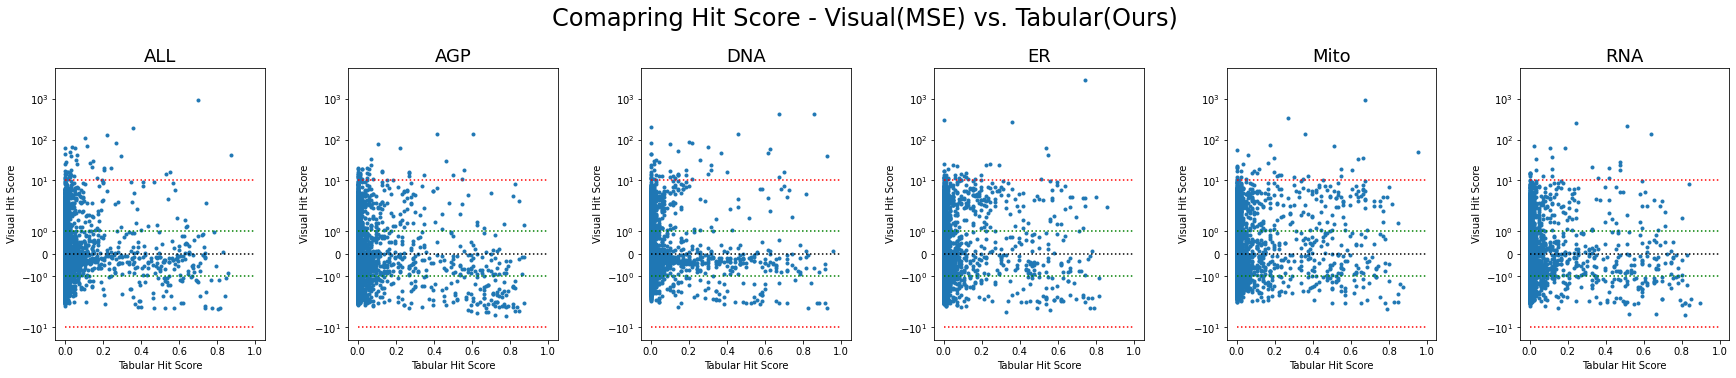

In [70]:
ncol = 6
nrow = 1

d={'xlabel':"Tabular Hit Score", 'ylabel':"Visual Hit Score"}
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle(f'Comapring Hit Score - Visual(MSE) vs. Tabular(Ours)', fontsize = 24, y=1.05)

for i, chan in enumerate(['ALL'] + CHANNELS):
    ax[i].set_yscale('symlog', base=10)
#     ax[i].set_xscale('symlog', base=10)
#     ax[i].set(xlim=(0, 40), ylim=(0, 40))
    
    ax[i].plot(all_scores[f'{chan}_map'], all_scores[f'MSE_{chan}'], '.')
    ax[i].plot([0,1], [0,0], 'k:')
    ax[i].plot([0,1], [1,1], 'g:')
    ax[i].plot([0,1], [-1,-1], 'g:')
    ax[i].plot([0,1], [10,10], 'r:')
    ax[i].plot([0,1], [-10,-10], 'r:')

    ax[i].set_title(chan, fontsize = 18)
    ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)

In [ ]:
all_scores.query('ALL_map >= 0.8719')

,,,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,...,PCC_DNA,MSE_DNA,PCC_ER,MSE_ER,PCC_Mito,MSE_Mito,PCC_RNA,MSE_RNA,PCC_ALL,MSE_ALL
Plate,Metadata_broad_sample,Image_Metadata_Well,,,,,,,,,,,,,,,,,,,,,
25708,BRD-K05556515-001-07-4,g15,0.848837,0.928571,0.802326,0.953488,0.837209,0.871981,0.546512,0.657143,0.616279,0.674419,...,-10.968583,38.985595,-17.701569,3.912999,-34.32341,50.285645,-0.582949,8.177447,-18.037074,41.5


In [53]:
from scipy.stats import pearsonr

In [60]:
for i, chan in enumerate(['ALL'] + CHANNELS):
    print(pearsonr(all_scores.query(f'{chan}_map > 0.8')[f'{chan}_map'], all_scores.query(f'{chan}_map > 0.8')[f'PCC_{chan}'])[0])

-0.4591042644995134
0.1300341749419902
-0.28607040234325115
0.36161139553772603
-0.57942839982562
-0.34126329765436864


In [76]:
all_scores.filter(regex='ALL', axis=1)

ALL_map   ALL_raw  \
Plate Metadata_broad_sample  Image_Metadata_Well                       
24294 BRD-A00100033-001-04-8 a01                  0.004831  0.002415   
      BRD-A00267231-001-01-1 a02                  0.014493  0.000000   
      BRD-A00327403-103-01-9 a03                  0.000000  0.000000   
      BRD-A00520476-001-03-3 a04                  0.000000  0.000000   
      BRD-A00827783-001-04-8 a05                  0.000000  0.000000   
...                                                    ...       ...   
26786 BRD-K98956791-001-01-2 i23                  0.000000  0.000000   
      BRD-K99149118-001-01-9 f08                  0.000000  0.000000   
      BRD-K99547414-001-01-5 i17                  0.000000  0.000000   
      BRD-K99615821-001-01-7 c23                  0.041063  0.036232   
      BRD-K99647384-001-01-9 o08                  0.000000  0.000000   

                                                  ALL_raw1to1   PCC_ALL  \
Plate Metadata_broad_sample  Image_Metadata_Well                          
24294 BRD-A00100033-001-04-8 a01                     0.002415 -1.170394   
      BRD-A00267231-001-01-1 a02                     0.000000 -0.640408   
      BRD-A00327403-103-01-9 a03                     0.000000 -1.663104   
      BRD-A00520476-001-03-3 a04                     0.000000  1.864810   
      BRD-A00827783-001-04-8 a05                     0.000000  1.893704   
...                                                       ...       ...   
26786 BRD-K98956791-001-01-2 i23                     0.000000 -1.261679   
      BRD-K99149118-001-01-9 f08                     0.000000  1.230499   
      BRD-K99547414-001-01-5 i17                     0.000000 -1.503873   
      BRD-K99615821-001-01-7 c23                     0.031401  2.984652   
      BRD-K99647384-001-01-9 o08                     0.000000  1.897263   

                                                   MSE_ALL  
Plate Metadata_broad_sample  Image_Metadata_Well            
24294 BRD-A00100033-001-04-8 a01                  0.115724  
      BRD-A00267231-001-01-1 a02                 -0.345255  
      BRD-A00327403-103-01-9 a03                 -0.148017  
      BRD-A00520476-001-03-3 a04                 -0.151868  
      BRD-A00827783-001-04-8 a05                 -0.250879  
...                                                    ...  
26786 BRD-K98956791-001-01-2 i23                 -0.570040  
      BRD-K99149118-001-01-9 f08                 -0.497906  
      BRD-K99547414-001-01-5 i17                  0.068748  
      BRD-K99615821-001-01-7 c23                 -1.076033  
      BRD-K99647384-001-01-9 o08                 -0.642137  

[11197 rows x 5 columns]

In [26]:
for c in CHANNELS + ['ALL']:
    all_scores[f'PCC_{c}'] = all_scores[f'PCC_{c}'] * -1

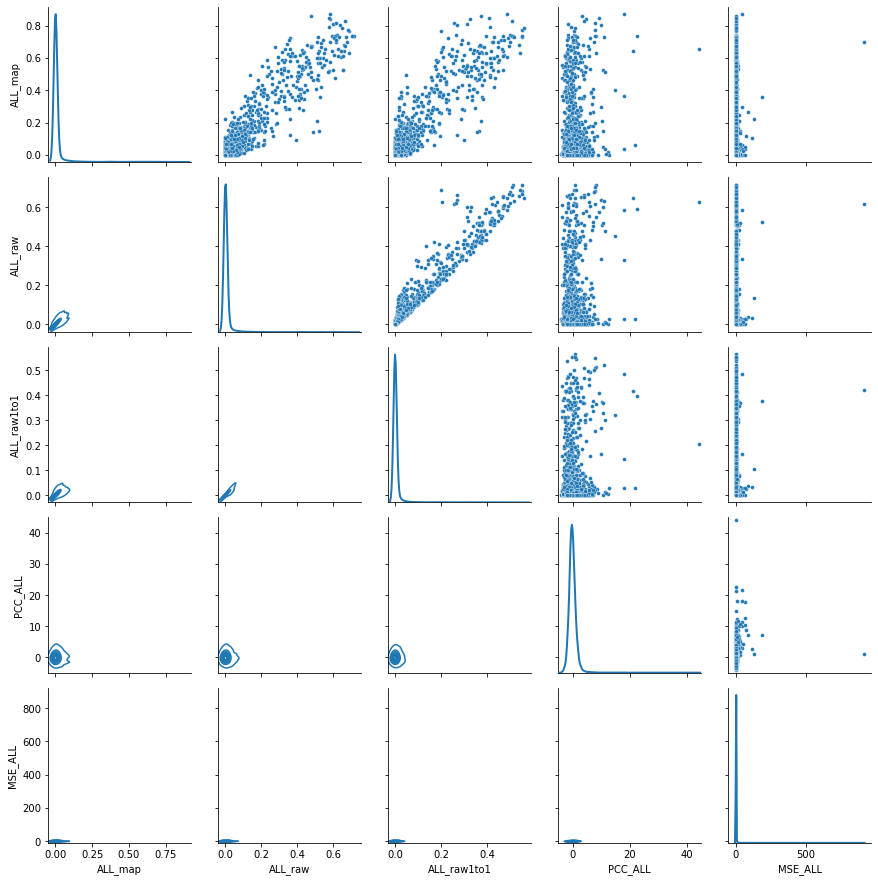

In [27]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ALL', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

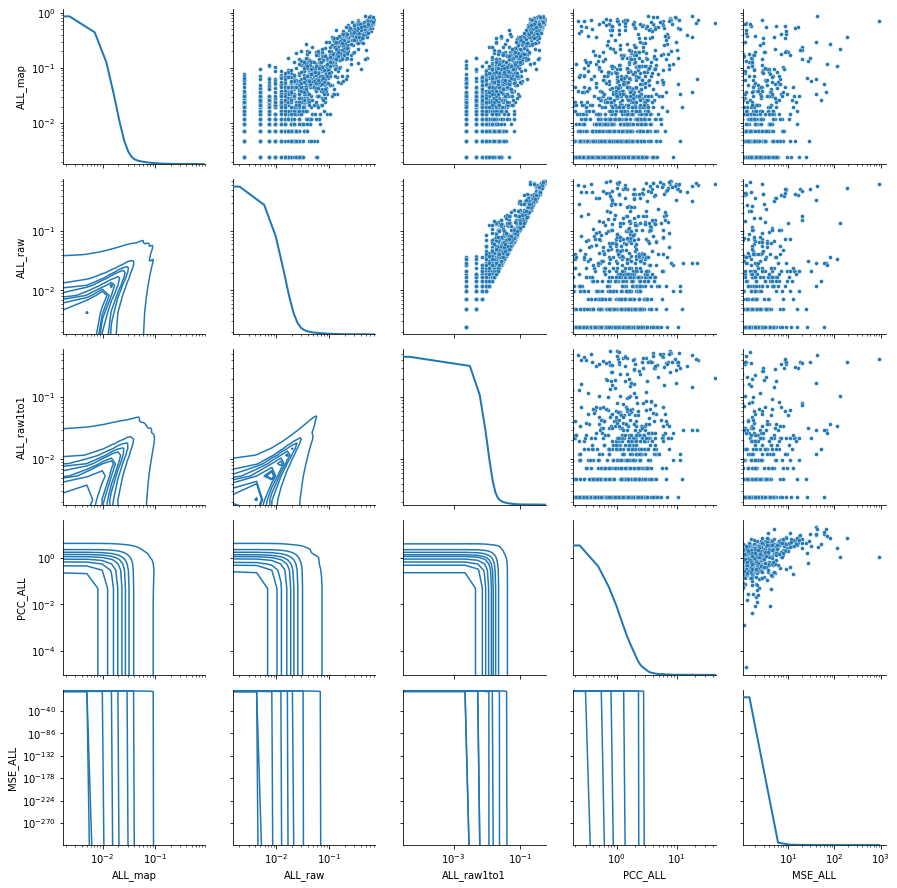

In [28]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ALL', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
for axs in g.axes:
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')


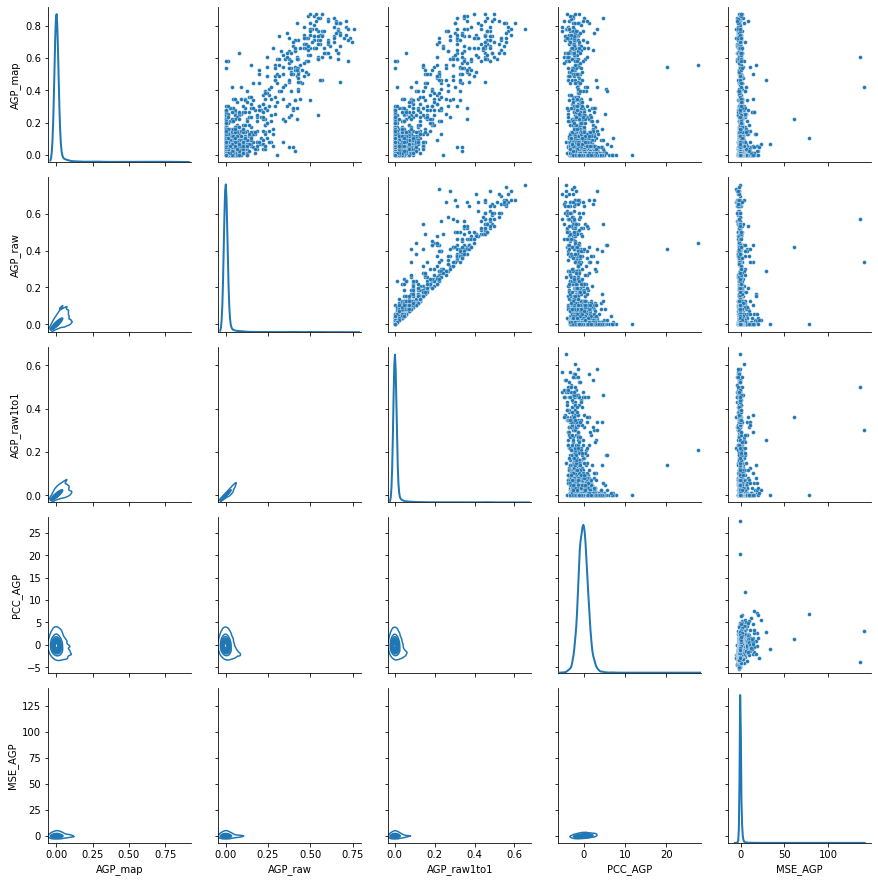

In [29]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='AGP', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

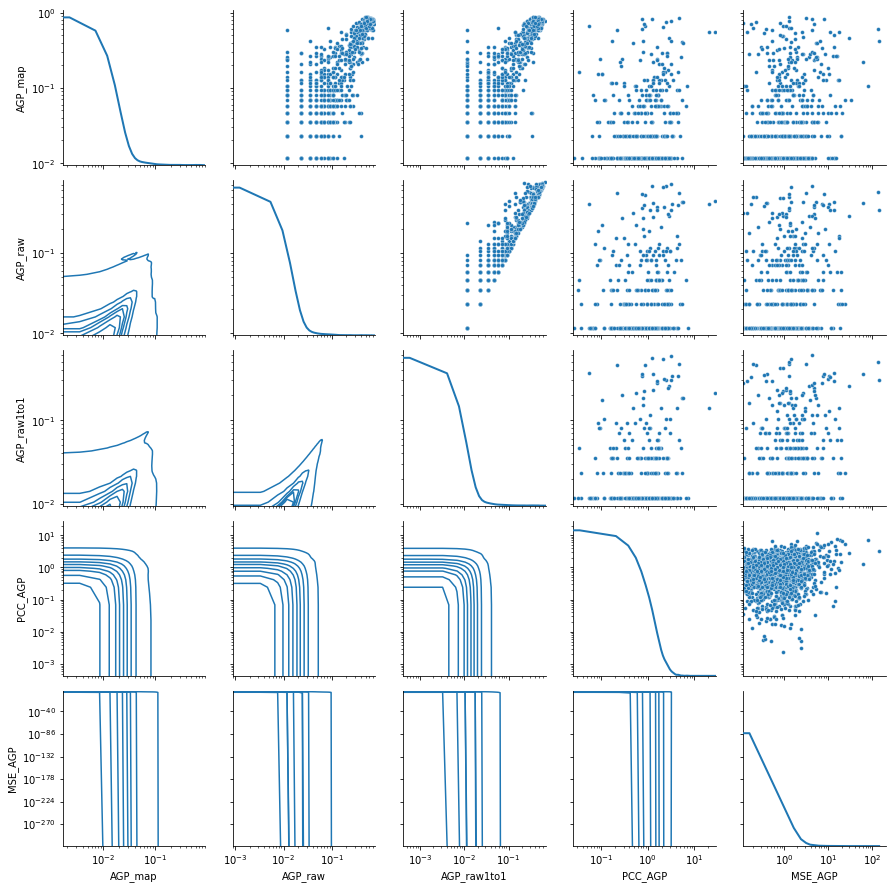

In [34]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='AGP', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

for axs in g.axes:
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')

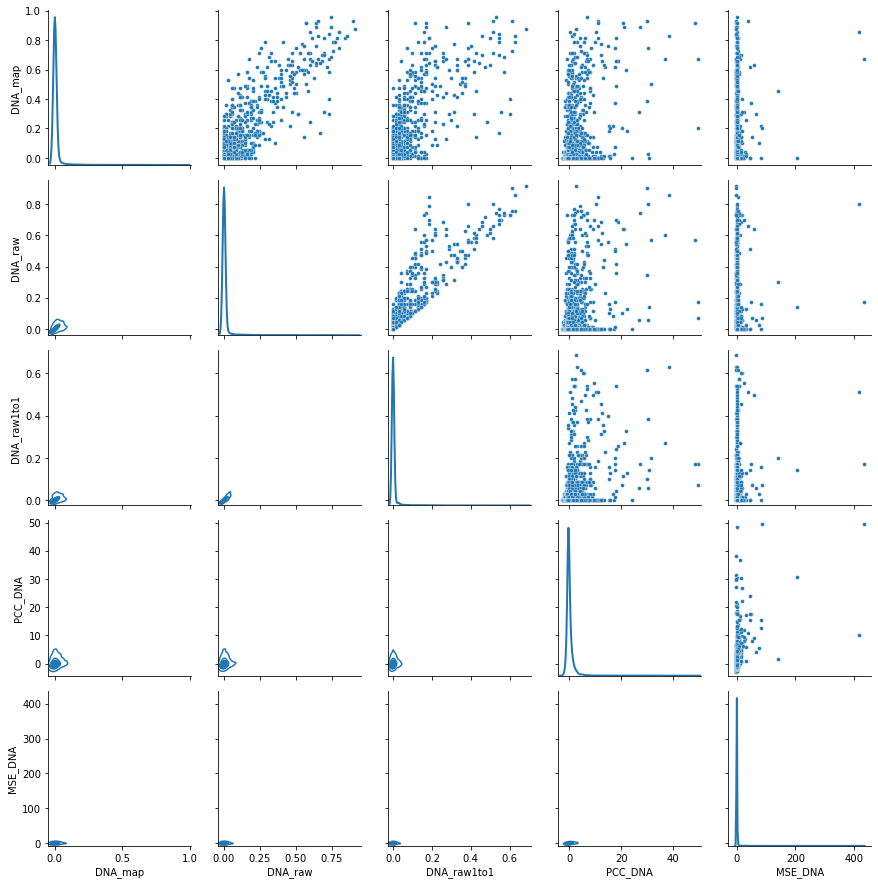

In [30]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='DNA', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

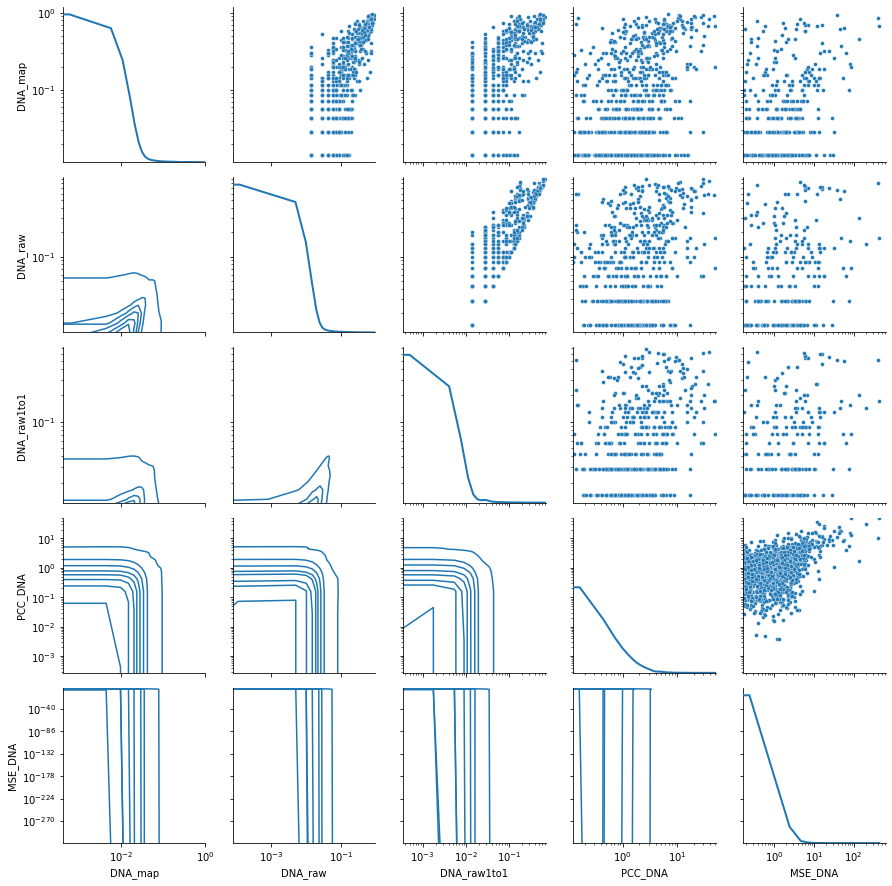

In [35]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='DNA', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
for axs in g.axes:
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')

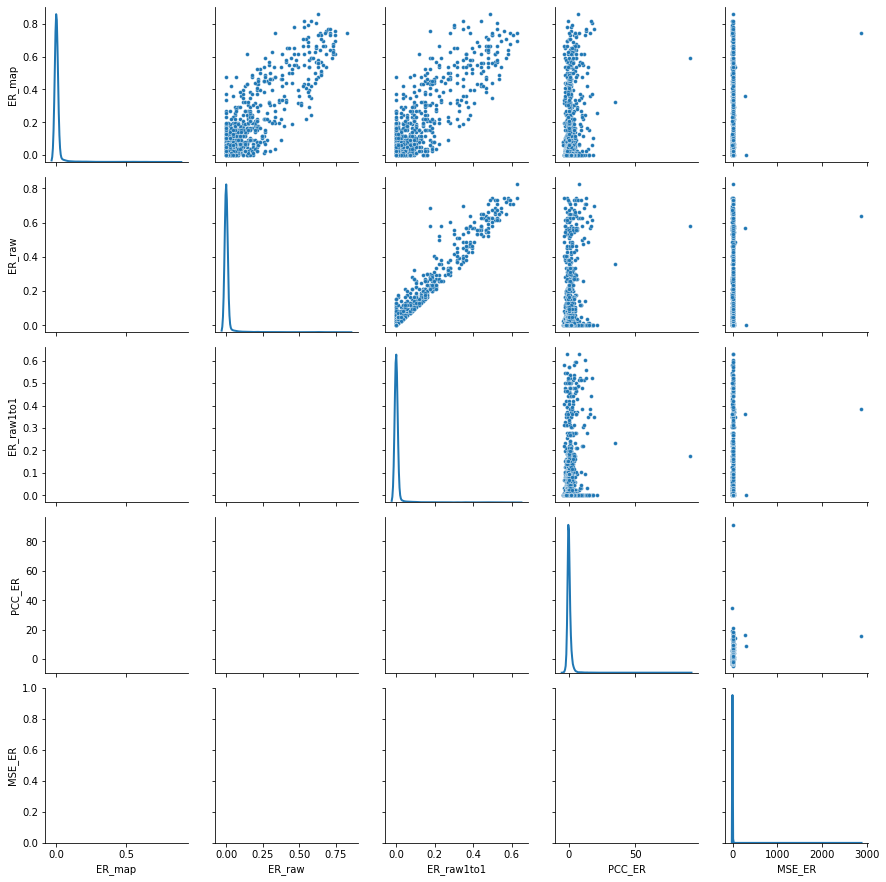

In [36]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ER', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

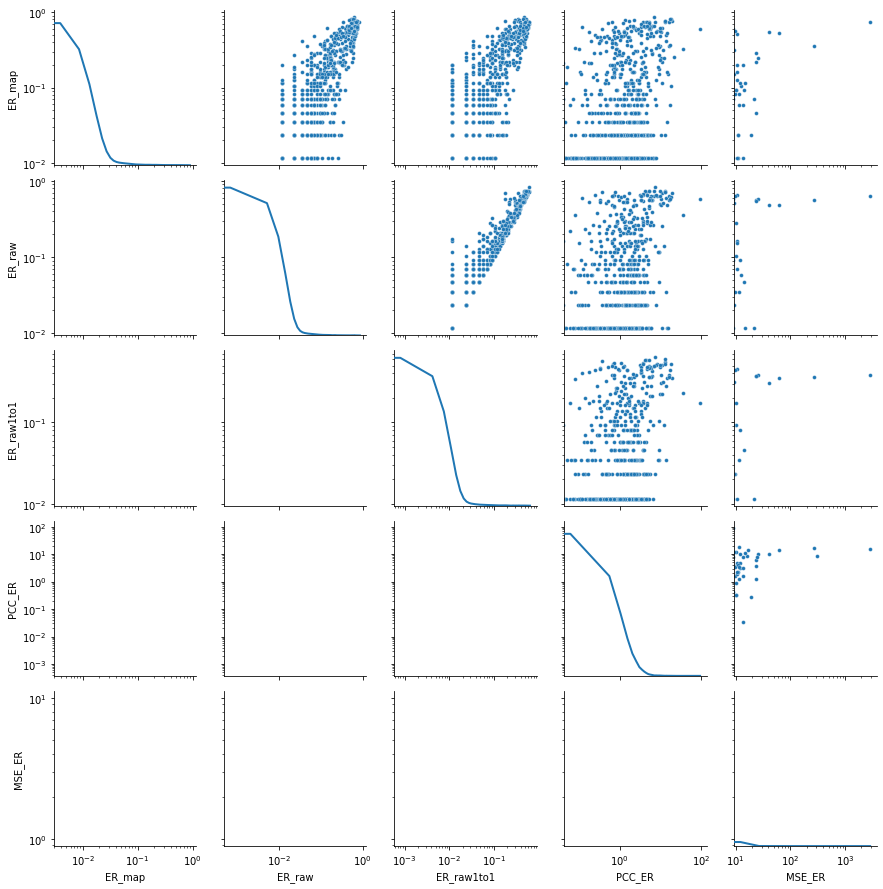

In [37]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ER', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
for axs in g.axes:
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')

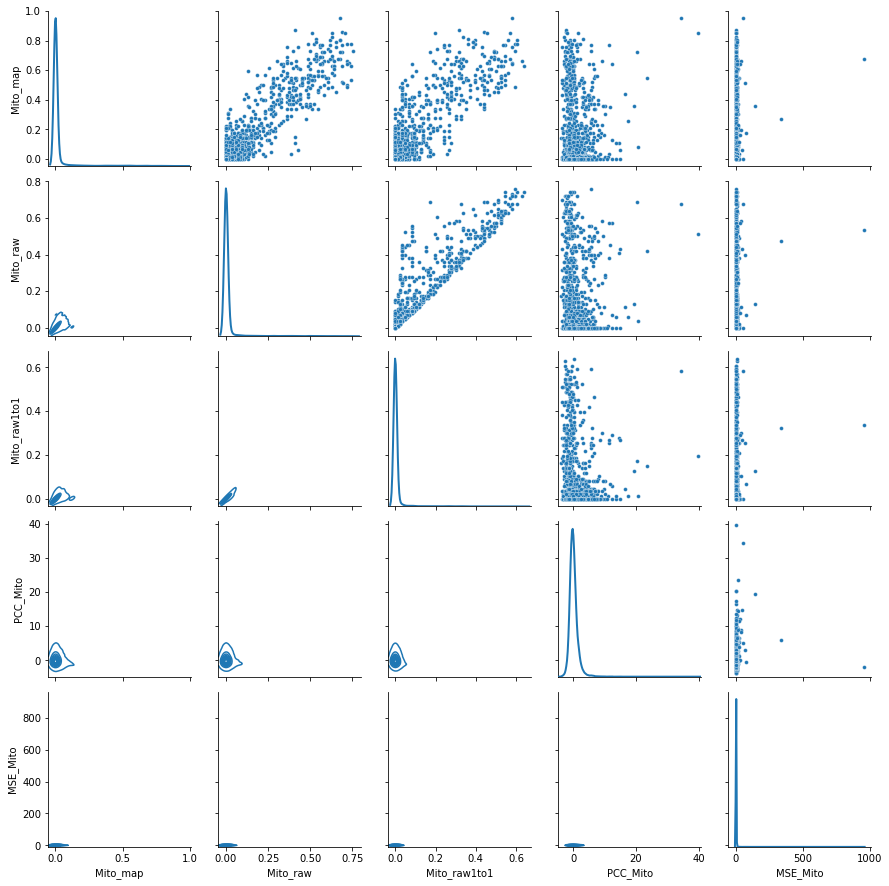

In [32]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='Mito', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

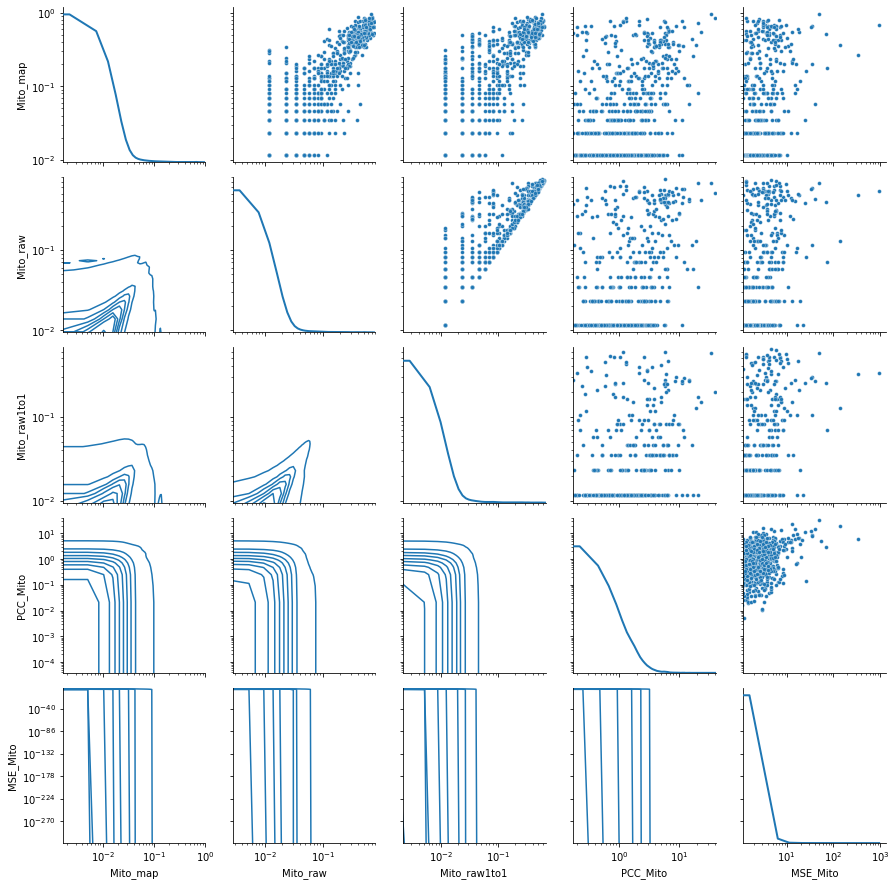

In [38]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='Mito', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
for axs in g.axes:
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')

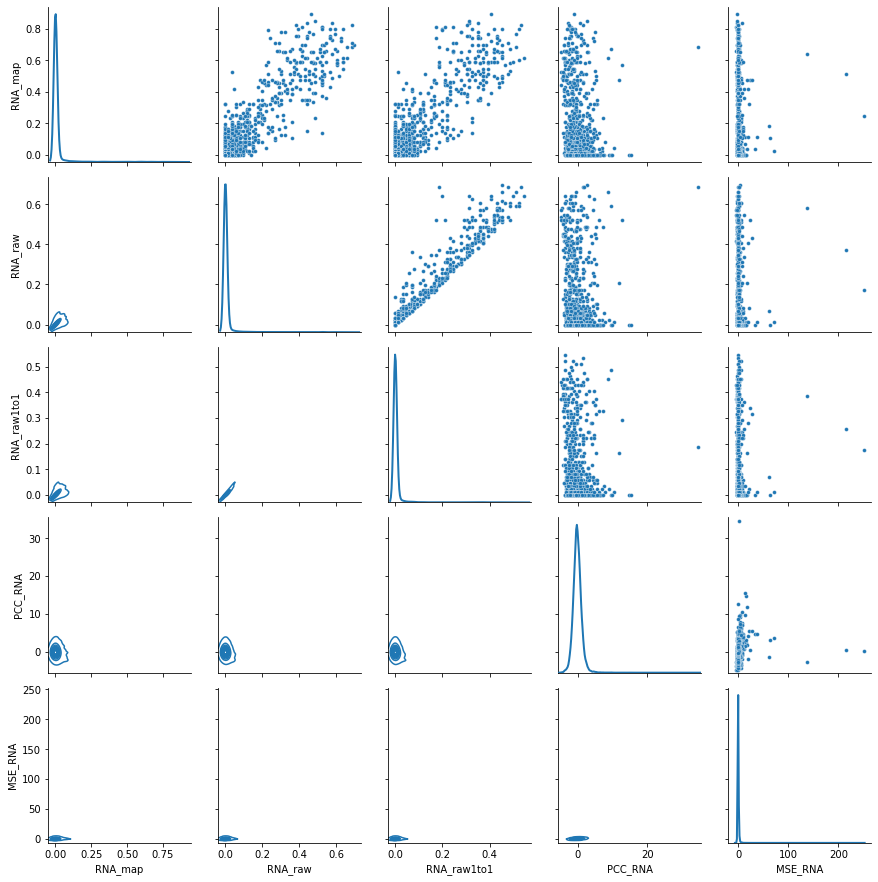

In [33]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='RNA', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

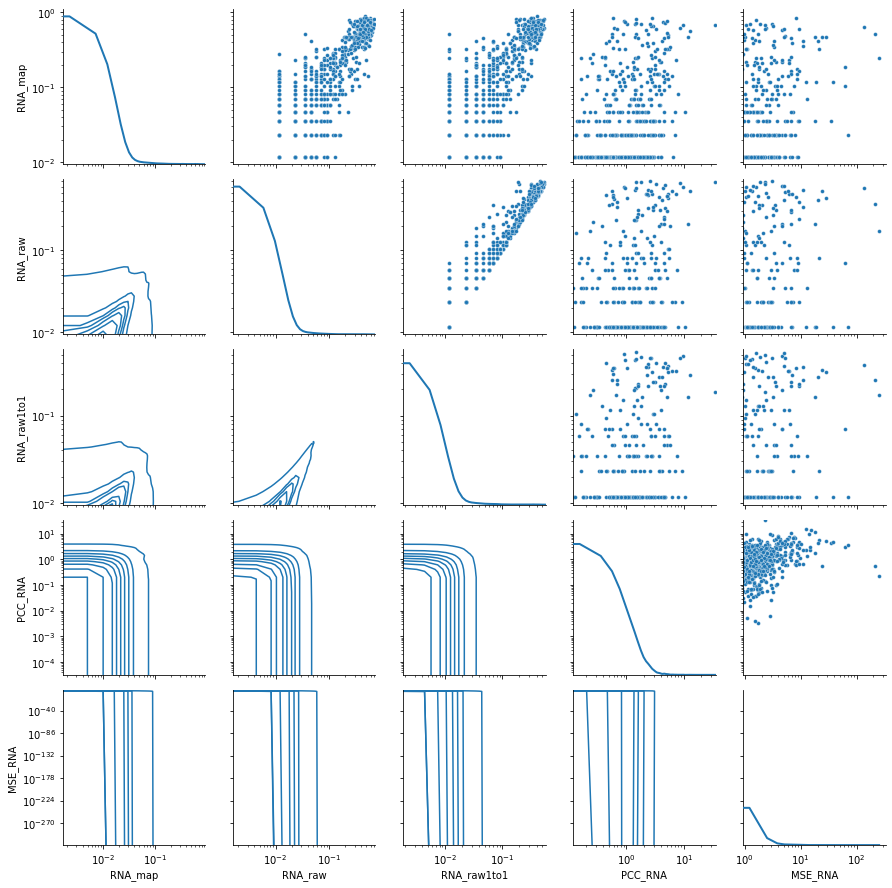

In [39]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='RNA', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
for axs in g.axes:
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')

# New

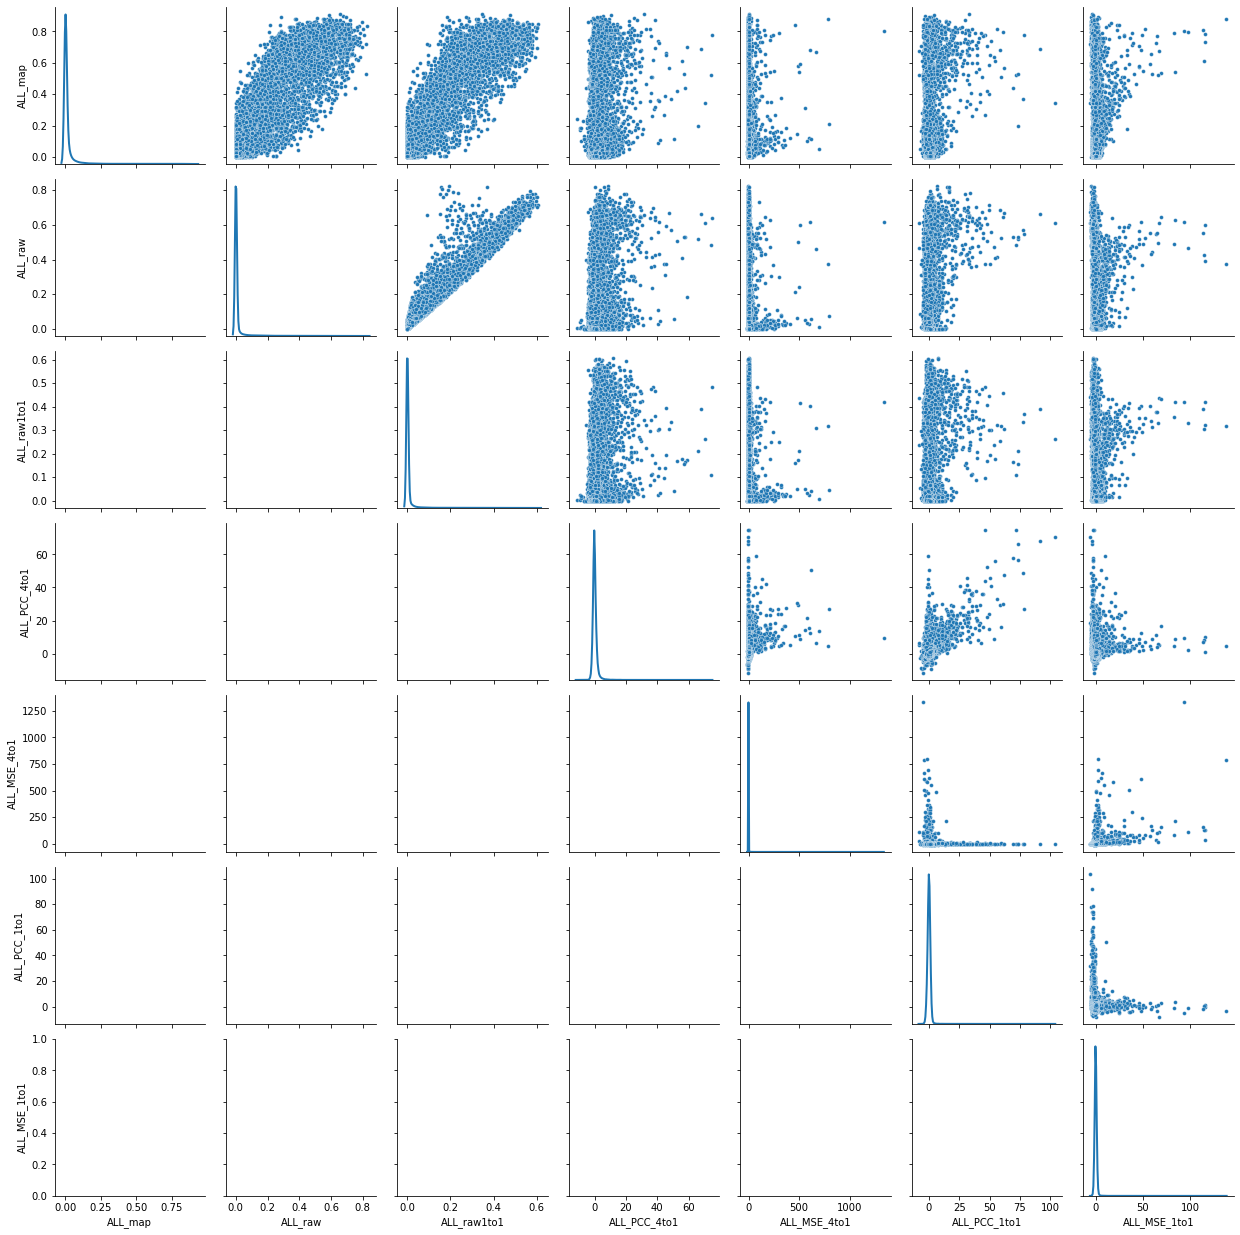

In [56]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ALL', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
# for axs in g.axes:
#     for ax in axs:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

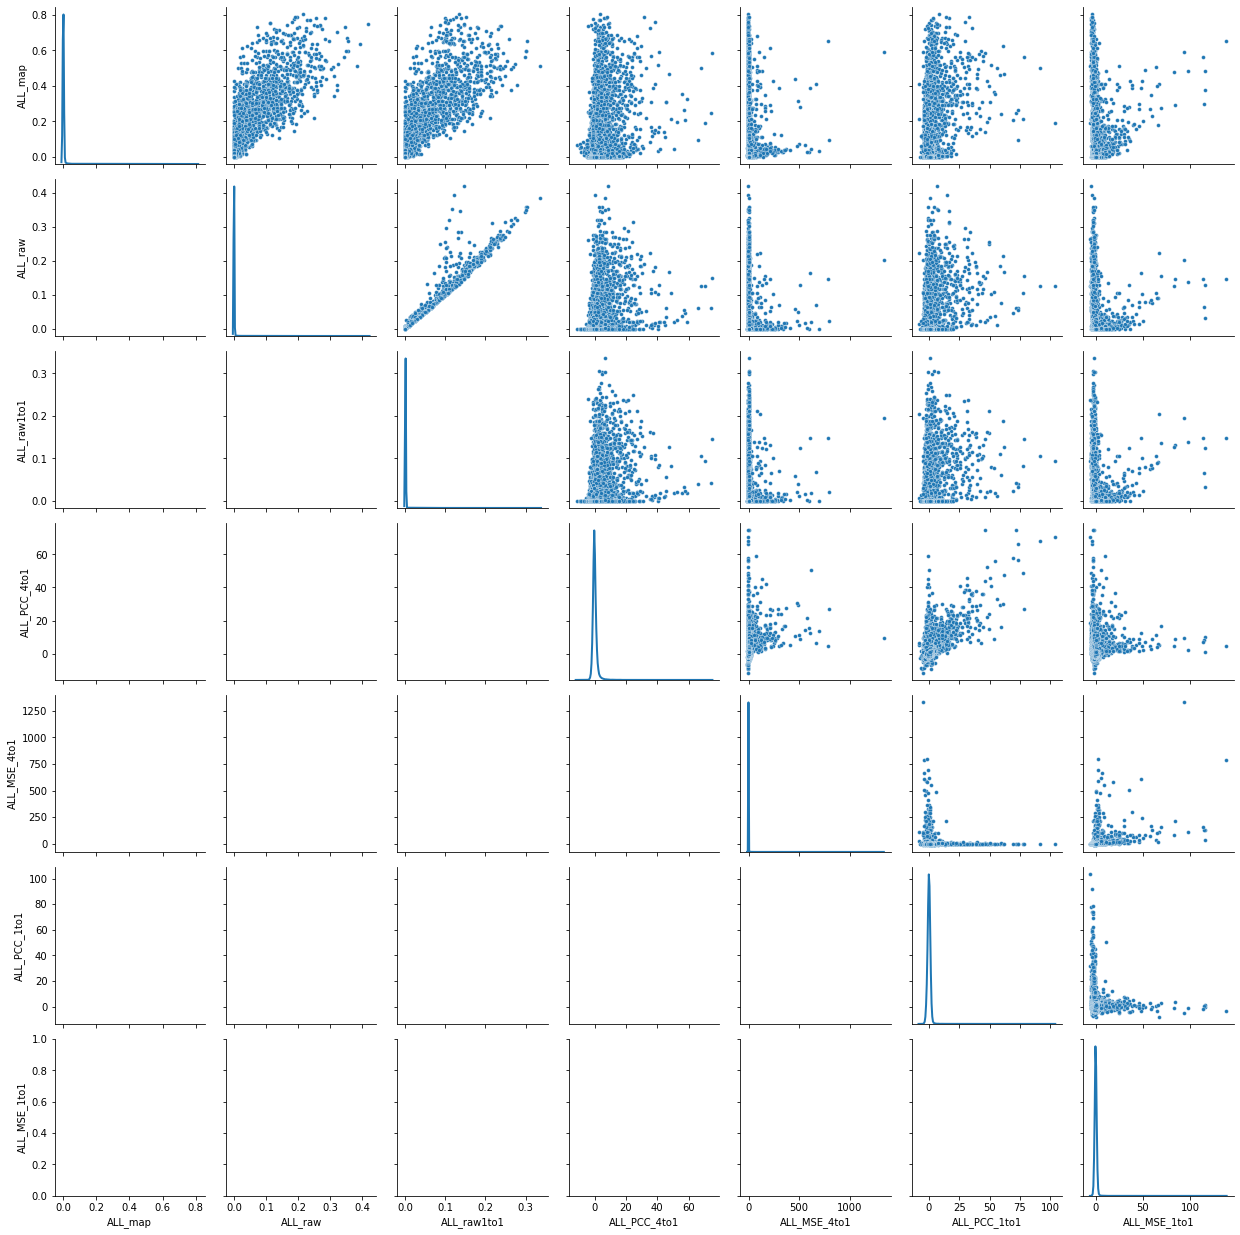

In [15]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ALL', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
# for axs in g.axes:
#     for ax in axs:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

In [31]:
# https://stackoverflow.com/questions/22104256/does-matplotlib-have-a-function-for-drawing-diagonal-lines-in-axis-coordinates
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

NameError: name 'add_identity' is not defined

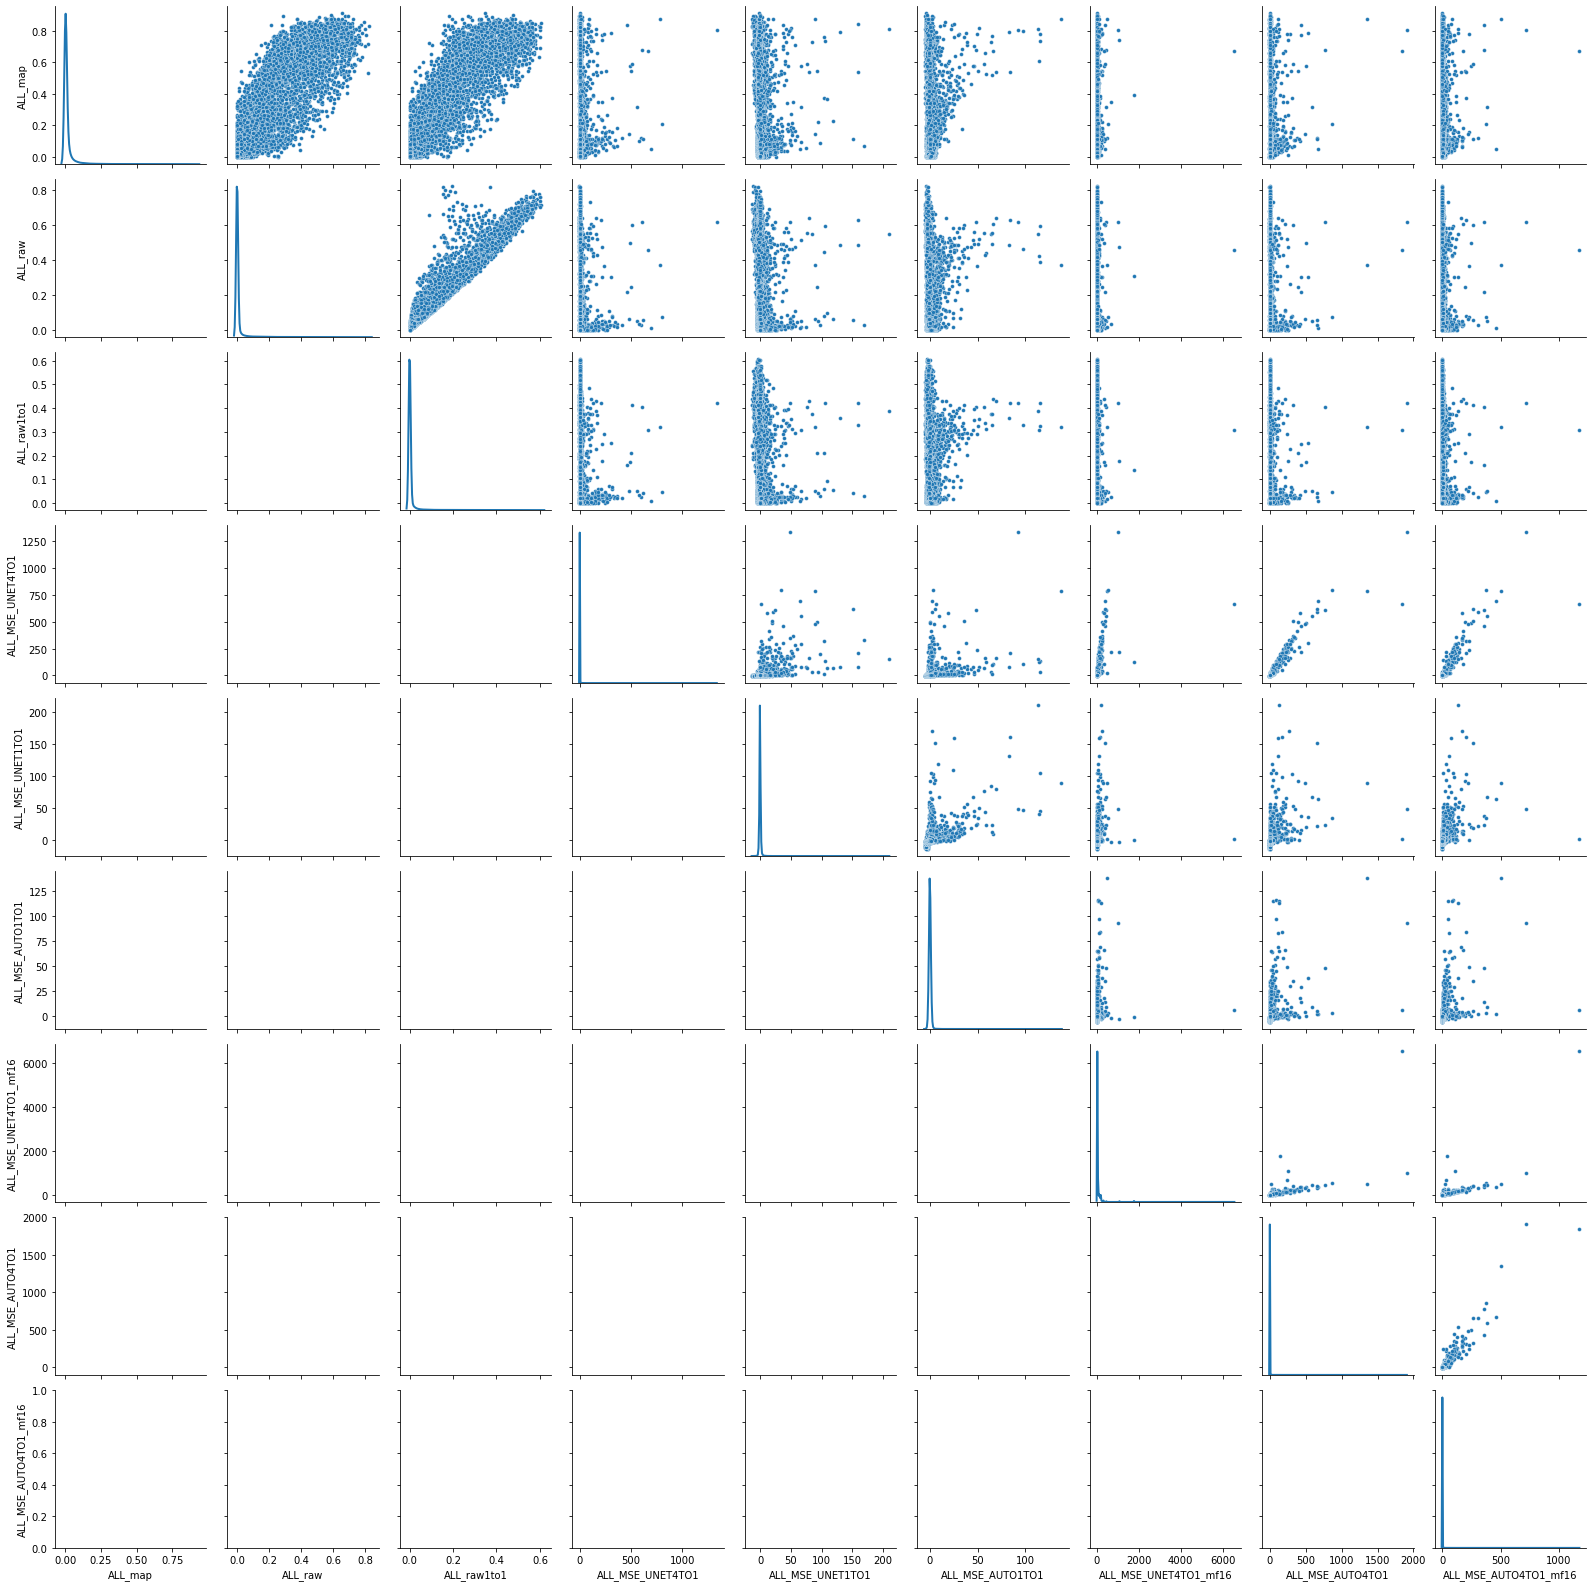

In [45]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ALL_(MSE|raw|map)', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

for i in range(9):
    for j in range(i+1,9):
        add_identity(g.axes[i][j], color='r', ls='--')
# for axs in g.axes:
#     for ax in axs:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

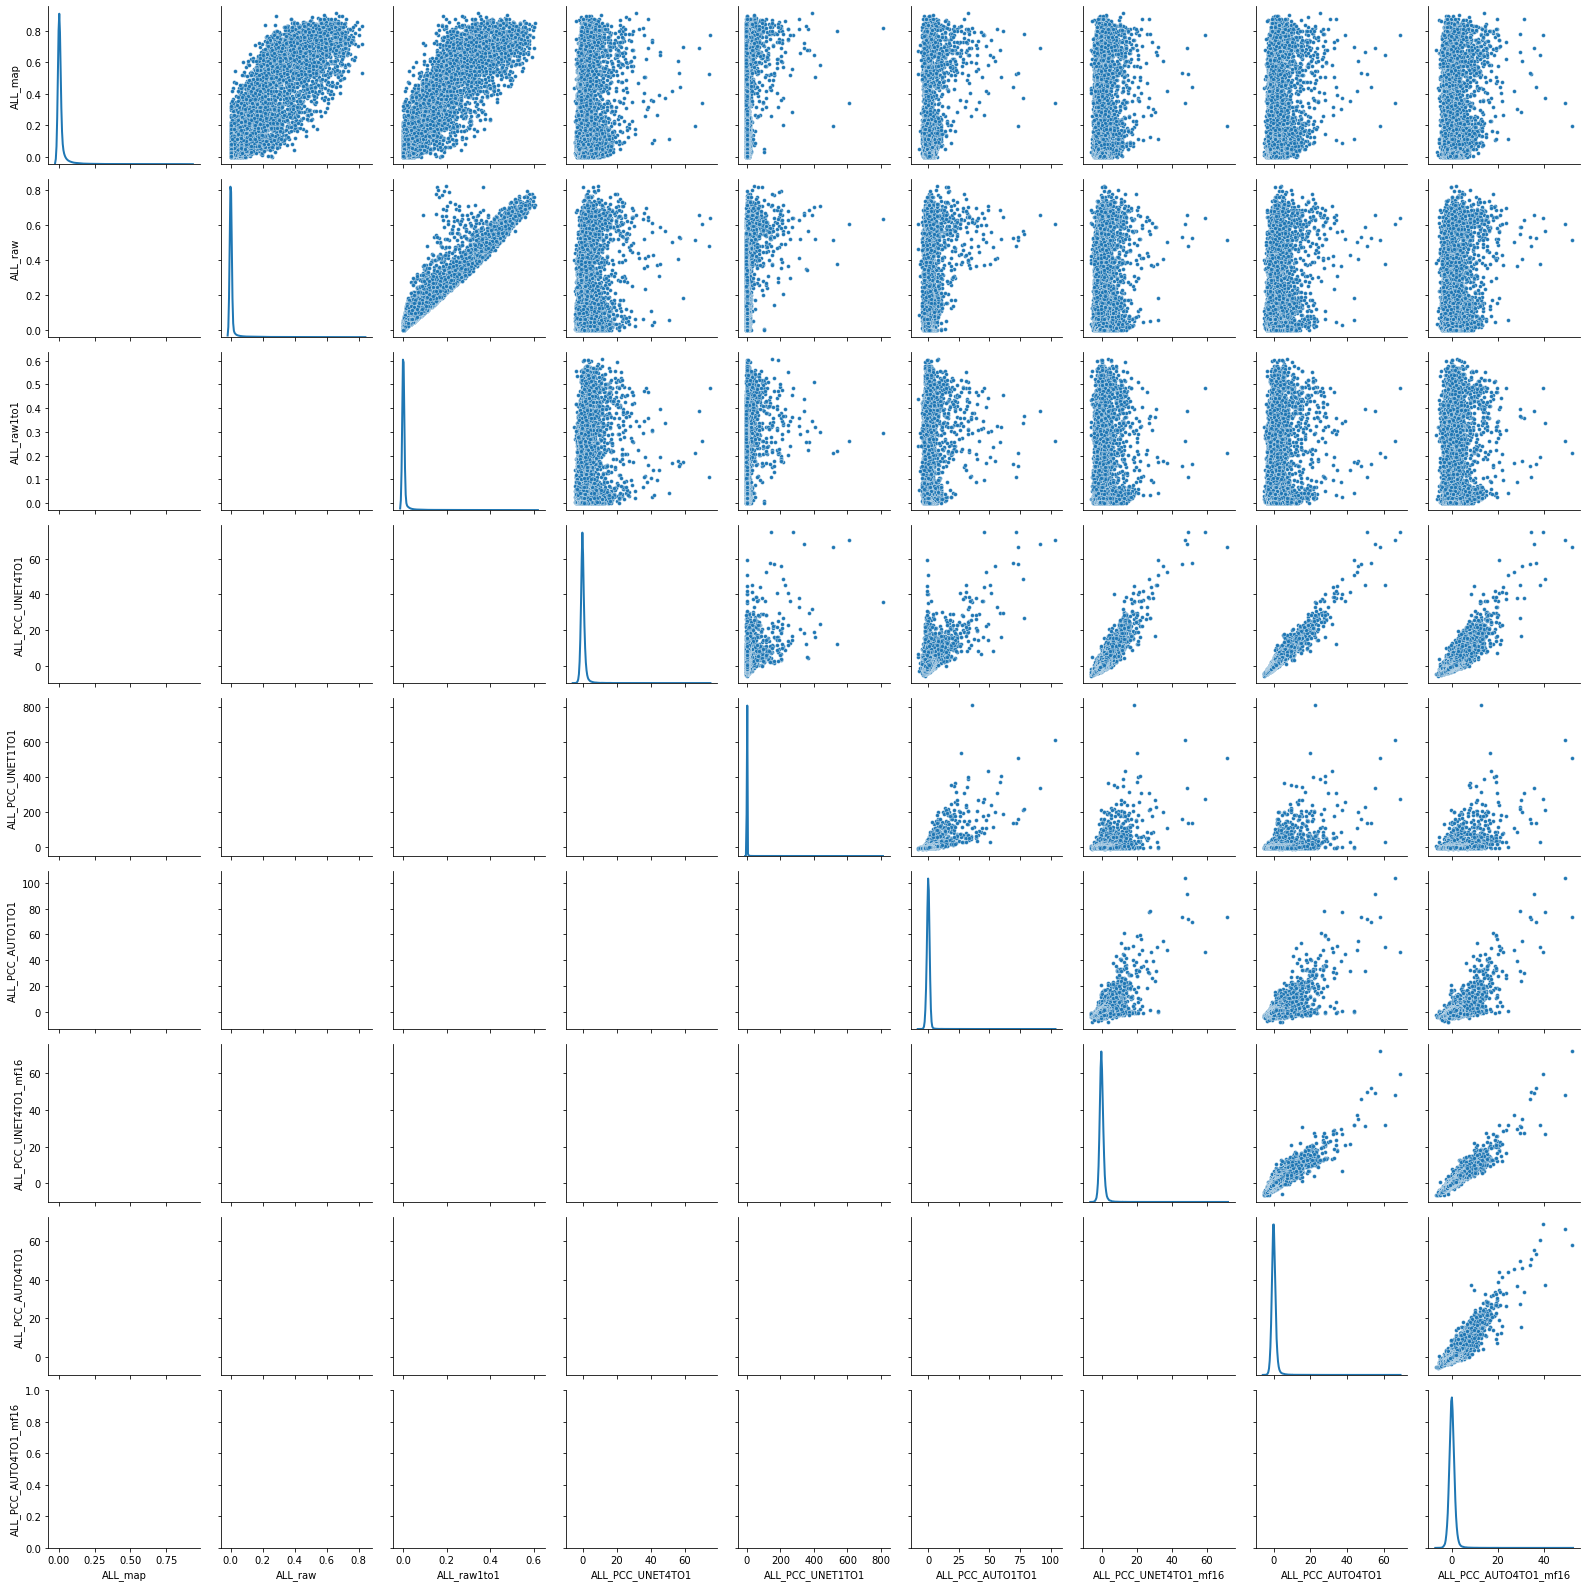

In [30]:
import seaborn as sns

g = sns.PairGrid(all_scores.filter(regex='ALL_(PCC|raw|map)', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
# for axs in g.axes:
#     for ax in axs:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

In [41]:
from scipy.stats import pearsonr

In [42]:
r, _ = pearsonr(all_scaled['ALL_map'], all_scaled['ALL_raw'])

(0.9122007466108731, 0.0)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(all_scores)

all_scaled = pd.DataFrame(scaler.transform(all_scores), index=all_scores.index, columns=all_scores.columns)

In [38]:
cols = all_scaled.filter(regex='ALL_(MSE|raw|map)', axis=1).columns
cols

Index(['ALL_map', 'ALL_raw', 'ALL_raw1to1', 'ALL_MSE_UNET4TO1',
       'ALL_MSE_UNET1TO1', 'ALL_MSE_AUTO1TO1', 'ALL_MSE_UNET4TO1_mf16',
       'ALL_MSE_AUTO4TO1', 'ALL_MSE_AUTO4TO1_mf16'],
      dtype='object')

In [ ]:
import seaborn as sns

g = sns.PairGrid(all_scaled.filter(regex='ALL_(MSE|raw|map)', axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
# for axs in g.axes:
#     for ax in axs:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

for i in range(9):
    for j in range(i+1,9):
        add_identity(g.axes[i][j], color='r', ls='--')
        r, _ = pearsonr(all_scores[cols[i]], all_scores[cols[j]])
        g.axes[i][j].text(50,5,f'{r:.2f}')
#         g.axes[i][j].text(50,5,f"{(all_scaled[cols[i]]>all_scaled[cols[j]]).sum()/all_scaled.shape[0]:.1%}")

NameError: name 'all_scaled' is not defined